In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import random
from datetime import datetime, timedelta

In [3]:
data = pd.read_csv("gen_data.csv")

In [4]:
data.columns

Index(['Employee', 'Task', 'Today', 'Start date', 'Completion date',
       'Tasks Assigned', 'Completed Tasks', 'Tasks Remaining',
       'Tasks Completed by deadline', 'Time Spent', 'Total task time',
       'Time Spent on tasks %', 'On-Time Completion', 'Task Completion Rate %',
       'Workload Distribution', 'Productivity', 'Resource Utilization',
       'TeamA', 'TeamB', 'Collaboration via Messages',
       'Collaboration via calls', 'Engagement Level', 'Collaboration (Calls)',
       'Collaboration (Messages)', 'Time spent', 'Total Task Time'],
      dtype='object')

## ENGAGEMENT HEATMAP

<Axes: xlabel='TeamB', ylabel='Employee'>

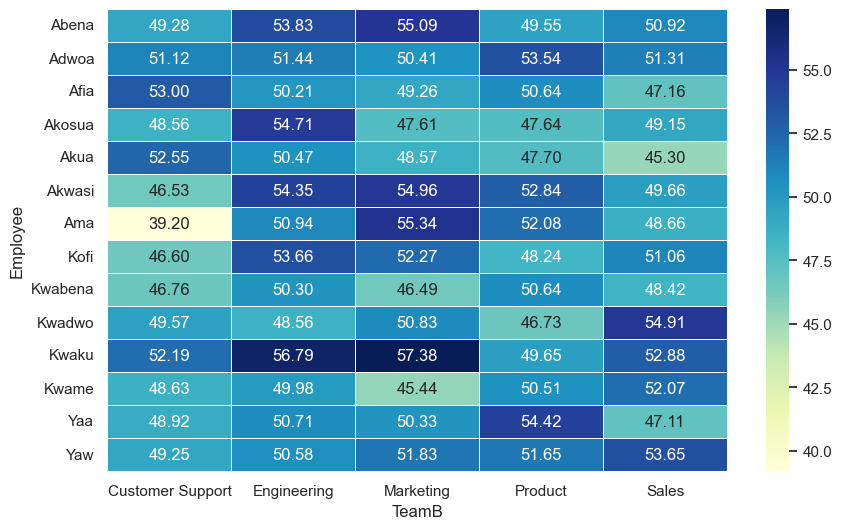

In [4]:
sns.set_theme()
x= data["Employee"]
y=data["TeamB"]

vis_data = data.pivot_table(index=x, columns=y, values="Engagement Level", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(vis_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

## EMPLOYEE ENGAGEMENT ACROSS ALL TEAMS

Text(0.5, 1.0, 'Mean Engagement Level for Kwadwo')

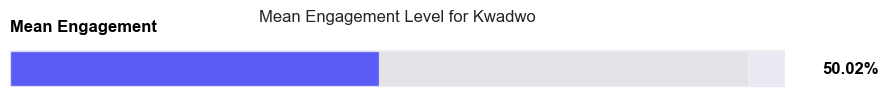

In [208]:
import random

#Calculate mean engagement level for each Employee across all teams
employee = random.choice(data["Employee"])
mean_engagement = data[data["Employee"] == employee]["Engagement Level"].mean()


# Create the bar visualization
fig, ax = plt.subplots(figsize=(10, 0.5))

# Plot the background bar (full length = 100%)
ax.barh(y=0, width=100, height=0.5, color="lightgray", alpha=0.3)

# Plot the filled portion (mean engagement)
ax.barh(y=0, width=mean_engagement, height=0.5, color="blue", alpha=0.6)

# Add "Mean Engagement" label at the top of the bar
ax.text(0, 0.6, "Mean Engagement", ha="left", va="center", color="black", fontsize=12, fontweight="bold")

# Add the mean value at the end of the bar
ax.text(mean_engagement + 60, 0, f"{mean_engagement:.2f}%", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
                               
# Customize the plot
#ax.set_xlim(0, 100)
ax.set_xticks([])
ax.set_yticks([])  # Hide y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.title(f"Mean Engagement Level for {employee}", pad=20)



## TASK COMPLETION

Text(0.5, 1.0, 'Mean Task Completion Rate for Kwadwo')

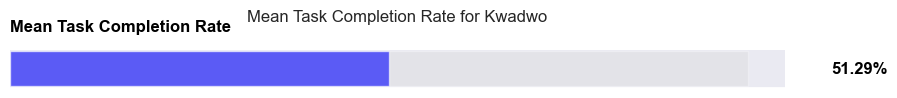

In [192]:


#Calculate mean task completion rate for each employee
employee = random.choice(data["Employee"])
mean_task_completion = data[data["Employee"] == employee]["Task Completion Rate %"].mean()


# Create the bar visualization
fig, ax = plt.subplots(figsize=(10, 0.5))

# Plot the background bar (full length = 100%)
ax.barh(y=0, width=100, height=0.5, color="lightgray", alpha=0.3)

# Plot the filled portion (mean task completion)
ax.barh(y=0, width=mean_task_completion, height=0.5, color="blue", alpha=0.6)

# Add "Mean Task Completion" label at the top of the bar
ax.text(0, 0.6, "Mean Task Completion Rate", ha="left", va="center", color="black", fontsize=12, fontweight="bold")

# Add the mean value at the end of the bar
ax.text(mean_task_completion + 60, 0, f"{mean_task_completion:.2f}%", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
                               
# Customize the plot
#ax.set_xlim(0, 100)
ax.set_xticks([])
ax.set_yticks([])  # Hide y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.title(f"Mean Task Completion Rate for {employee}", pad=20)



## WORKLOAD DISTRIBUTION

Text(0.5, 1.0, 'Work Distribution for Kwadwo')

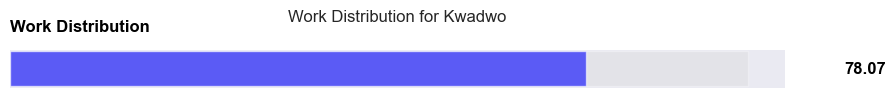

In [187]:

employee = random.choice(data["Employee"])

# Calculate the mean tasks assigned by employee
employee_tasks_assigned = data.groupby("Employee")["Tasks Assigned"].sum()
total_tasks = data["Tasks Assigned"].sum()


    
# Get the mean tasks for the selected employee
tasks = (employee_tasks_assigned[employee] / total_tasks) * 1000
    
# Create the bar visualization
fig, ax = plt.subplots(figsize=(10, 0.5))
    
# Plot the background bar (full length = 100)   
ax.barh(y=0, width=100, height=0.5, color="lightgray", alpha=0.3)
    
# Plot the filled portion (mean tasks for the selected employee)
ax.barh(y=0, width=tasks, height=0.5, color="blue", alpha=0.6)
    
ax.text(0, 0.6, "Work Distribution", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Add the mean value at the end of the bar
ax.text(tasks + 35, 0, f"{tasks:.2f}", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Customize the plot

ax.set_xticks([])  # Hide x-axis tick labels
ax.set_yticks([])  # Hide y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)  # Hide the x-axis line
ax.set_xlabel("")  # Remove x-axis label
    
plt.title(f"Work Distribution for {employee}", pad=20)
    





## TIME SPENT ON TASKS

Text(0.5, 1.0, 'Time Spent for Kwadwo')

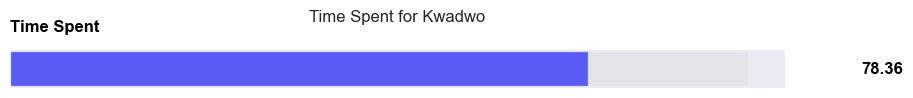

In [182]:

employee = random.choice(data["Employee"])

# Calculate the total assigned time to employee and the sum of the total task time of all employees
employee_time_spent = data.groupby("Employee")["Time spent"].sum()
total_tasks_time = data["Total Task Time"].sum()


    
# Get the mean time spent for the selected employee
time_spent = (employee_time_spent[employee] / total_tasks_time) * 1000

    
# Create the bar visualization
fig, ax = plt.subplots(figsize=(10, 0.5))
    
# Plot the background bar (full length = 100)   
ax.barh(y=0, width=100, height=0.5, color="lightgray", alpha=0.3)
    
# Plot the filled portion (mean tasks for the selected employee)
ax.barh(y=0, width=time_spent, height=0.5, color="blue", alpha=0.6)
    
ax.text(0, 0.6, "Time Spent", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Add the mean value at the end of the bar
ax.text(time_spent + 37, 0, f"{time_spent:.2f}", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Customize the plot

ax.set_xticks([])  # Hide x-axis tick labels
ax.set_yticks([])  # Hide y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)  # Hide the x-axis line
ax.set_xlabel("")  # Remove x-axis label
    
plt.title(f"Time Spent for {employee}", pad=20)
    





## RESOURCE UTILIZATION

Text(0.5, 1.0, 'Resource Utilization for Kwadwo')

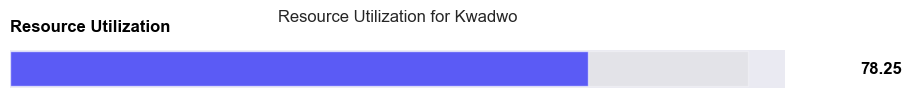

In [165]:

employee = random.choice(data["Employee"])

# Calculate the total assigned time to employee and the sum of the total task time of all employees
employee_resource_utilization = data.groupby(data["Employee"])["Resource Utilization"].count()
total_resource_utilization = data["Resource Utilization"].count()


    
# Get the mean time spent for the selected employee
resource_utilization = (employee_resource_utilization[employee] / total_resource_utilization) * 1000

    
# Create the bar visualization
fig, ax = plt.subplots(figsize=(10, 0.5))
    
# Plot the background bar (full length = 100)   
ax.barh(y=0, width=100, height=0.5, color="lightgray", alpha=0.3)
    
# Plot the filled portion (mean tasks for the selected employee)
ax.barh(y=0, width=resource_utilization, height=0.5, color="blue", alpha=0.6)
    
ax.text(0, 0.6, "Resource Utilization", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Add the mean value at the end of the bar
ax.text(resource_utilization + 37, 0, f"{resource_utilization:.2f}", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Customize the plot

ax.set_xticks([])  # Hide x-axis tick labels
ax.set_yticks([])  # Hide y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)  # Hide the x-axis line
ax.set_xlabel("")  # Remove x-axis label
    
plt.title(f"Resource Utilization for {employee}", pad=20)
    





## OVERALL PRODUCTIVITY

Text(0.5, 1.0, 'Productivity for Kwabena')

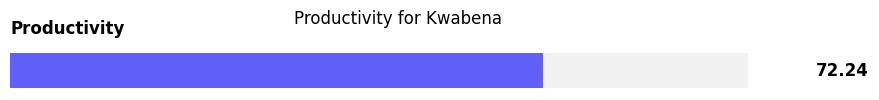

In [30]:

employee = random.choice(data["Employee"])

# Calculate the total assigned time to employee and the sum of the total task time of all employees
employee_productivity = data.groupby(data["Employee"])["Productivity"].sum()
total_productivity = data["Productivity"].sum()


    
# Get the mean time spent for the selected employee
productivity = (employee_productivity[employee] / total_productivity) * 1000

    
# Create the bar visualization
fig, ax = plt.subplots(figsize=(10, 0.5))
    
# Plot the background bar (full length = 100)   
ax.barh(y=0, width=100, height=0.5, color="lightgray", alpha=0.3)
    
# Plot the filled portion (mean tasks for the selected employee)
ax.barh(y=0, width=productivity, height=0.5, color="blue", alpha=0.6)
    
ax.text(0, 0.6, "Productivity", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Add the mean value at the end of the bar
ax.text(productivity + 37, 0, f"{productivity:.2f}", ha="left", va="center", color="black", fontsize=12, fontweight="bold")
    
# Customize the plot

ax.set_xticks([])  # Hide x-axis tick labels
ax.set_yticks([])  # Hide y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)  # Hide the x-axis line
ax.set_xlabel("")  # Remove x-axis label
    
plt.title(f"Productivity for {employee}", pad=20)
    





## PERFORMANCE TRENDS

In [5]:
data.columns

Index(['Employee', 'Task', 'Today', 'Start date', 'Completion date',
       'Tasks Assigned', 'Completed Tasks', 'Tasks Remaining',
       'Tasks Completed by deadline', 'Time Spent', 'Total task time',
       'Time Spent on tasks %', 'On-Time Completion', 'Task Completion Rate %',
       'Workload Distribution', 'Productivity', 'Resource Utilization',
       'TeamA', 'TeamB', 'Collaboration via Messages',
       'Collaboration via calls', 'Engagement Level', 'Collaboration (Calls)',
       'Collaboration (Messages)', 'Time spent', 'Total Task Time'],
      dtype='object')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

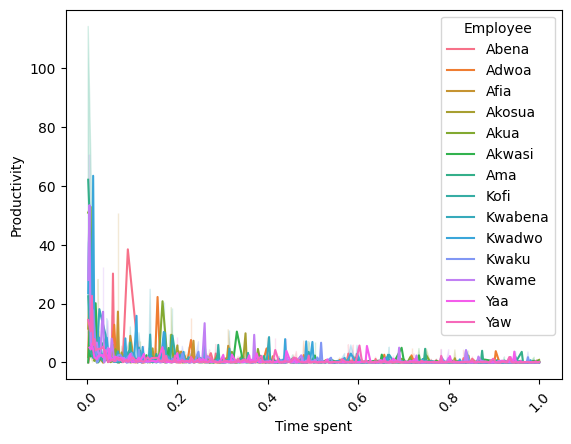

In [11]:
data["Completion date"] = pd.to_datetime(data["Completion date"])

#sort the data by 'Completion date'
data = data.sort_values("Employee")

sns.lineplot(data=data, x="Time spent", y="Productivity", hue="Employee", legend=True)

plt.xticks(rotation=45)

In [12]:
data.groupby("Employee")["Productivity"].sum()

Employee
Abena      229.449551
Adwoa      285.785608
Afia       338.245902
Akosua     276.369584
Akua       335.128610
Akwasi     191.865521
Ama        329.579091
Kofi       244.820472
Kwabena    304.634871
Kwadwo     466.874714
Kwaku      274.665067
Kwame      481.031055
Yaa        225.391520
Yaw        233.051425
Name: Productivity, dtype: float64

In [14]:
employees = data.groupby("Employee")

employees["Time spent"].sum()

Employee
Abena      180.380822
Adwoa      181.104110
Afia       171.290411
Akosua     188.090411
Akua       193.468493
Akwasi     173.227397
Ama        185.282192
Kofi       170.813699
Kwabena    179.230137
Kwadwo     198.816438
Kwaku      162.734247
Kwame      173.876712
Yaa        181.257534
Yaw        166.731507
Name: Time spent, dtype: float64

In [20]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
new_days = []
for _ in range(5000):
    day = random.choice(days)
    new_days.append(day)
data = pd.DataFrame(new_days, columns=["days"])

In [21]:
data.to_csv("days.csv")

In [6]:
gen_data = pd.read_csv("gen_data.csv")
gen_data.head()

,Employee,Task,Today,Start date,Completion date,Tasks Assigned,Completed Tasks,Tasks Remaining,Tasks Completed by deadline,Time Spent,...,TeamA,TeamB,Collaboration via Messages,Collaboration via calls,Engagement Level,Collaboration (Calls),Collaboration (Messages),Time spent,Total Task Time,days
0,Afia,advertising,7/23/2024,4/2/2024,12/29/2024,5,3,2,3,112,...,Engineering,Product,7844,48211,58.148340,0.557998,4.8211,0.306849,0.742466,Sunday
1,Ama,market research,3/2/2025,5/26/2024,1/13/2025,26,9,17,0,280,...,Marketing,Engineering,5557,52579,60.307054,0.608553,5.2579,0.767123,0.635616,Saturday
2,Adwoa,data analysis,5/17/2023,4/2/2023,5/25/2023,32,7,25,7,45,...,Customer Support,Marketing,1808,38367,41.675311,0.444063,3.8367,0.123288,0.145205,Friday
3,Afia,loyalty programs,5/4/2025,10/9/2024,12/28/2024,30,8,22,0,207,...,Sales,Engineering,2080,36302,39.815353,0.420162,3.6302,0.567123,0.219178,Monday
4,Yaw,customer relationship management,11/8/2023,3/29/2023,5/16/2023,8,0,8,0,224,...,Sales,Engineering,7604,29711,38.708506,0.343877,2.9711,0.613699,0.131507,Saturday


In [27]:
employees = gen_data.groupby("Employee")
days = gen_data.groupby("days")

In [30]:
day_prod = days["Productivity"].sum()

In [33]:
day_prod.keys()

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='days')

In [35]:
day_prod.values

array([475.21954715, 518.10260897, 510.6697785 , 802.26658899,
       769.6248331 , 581.49459001, 559.51504461])

<Axes: xlabel='days'>

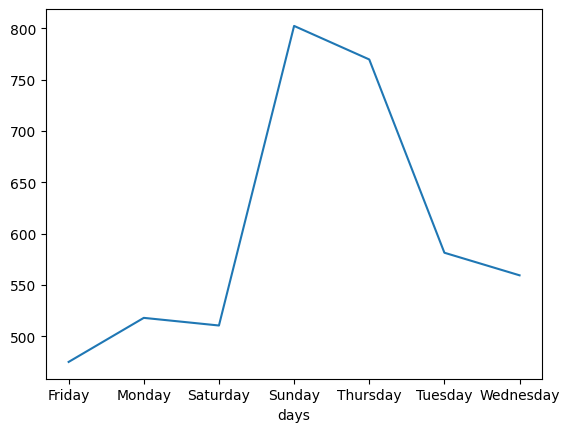

In [54]:
sns.lineplot(x=day_prod.keys(), y=day_prod.values)

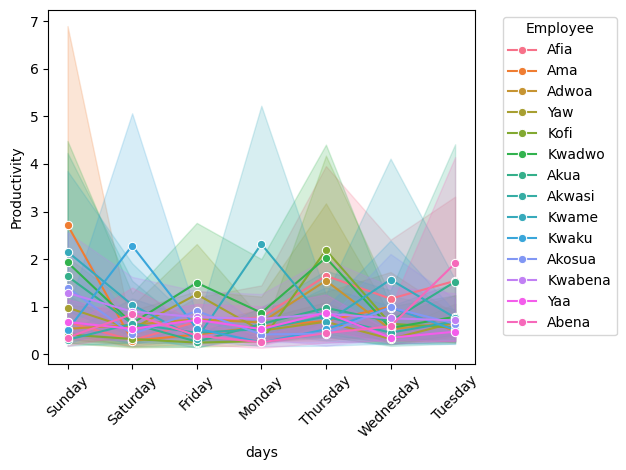

In [55]:
sns.lineplot(data=gen_data, x="days", y="Productivity", hue="Employee", marker="o")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc="upper left")

# Display the plot
plt.tight_layout()

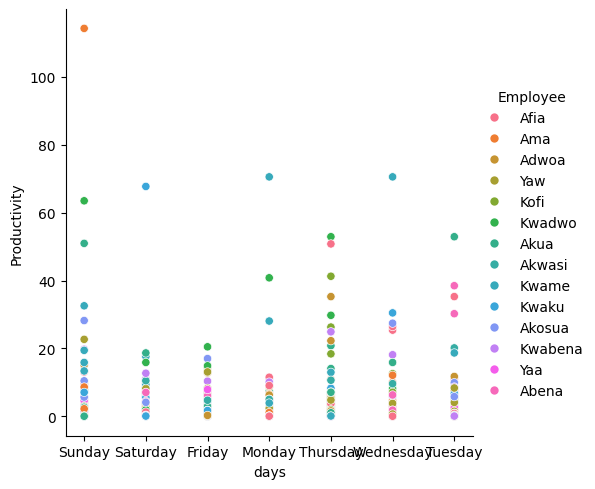

In [45]:
sns.relplot(data=gen_data, x="days", y="Productivity", hue="Employee")

In [49]:
emp_prod = employees["Productivity"].sum()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Abena'),
  Text(1, 0, 'Adwoa'),
  Text(2, 0, 'Afia'),
  Text(3, 0, 'Akosua'),
  Text(4, 0, 'Akua'),
  Text(5, 0, 'Akwasi'),
  Text(6, 0, 'Ama'),
  Text(7, 0, 'Kofi'),
  Text(8, 0, 'Kwabena'),
  Text(9, 0, 'Kwadwo'),
  Text(10, 0, 'Kwaku'),
  Text(11, 0, 'Kwame'),
  Text(12, 0, 'Yaa'),
  Text(13, 0, 'Yaw')])

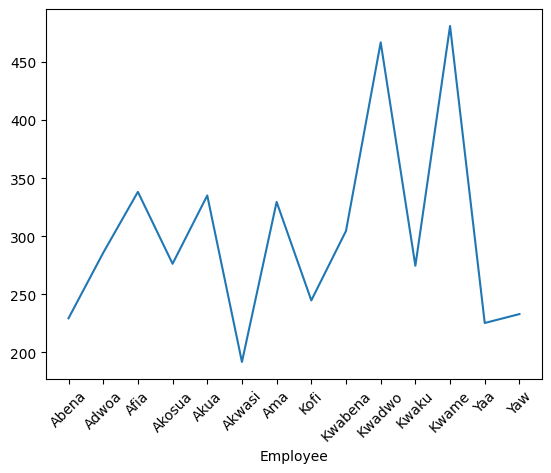

In [51]:
sns.lineplot(x=emp_prod.keys(), y=emp_prod.values)
plt.xticks(rotation=45)

In [7]:
gen_data_agg = gen_data.groupby(["Employee", "days"], as_index=False)["Productivity"].sum()


In [84]:
def plot_employees():

    plt.figure(figsize=(20, 6))

    sns.lineplot(data=gen_data_agg, x="days", y="Productivity", hue="Employee", marker="o")

    # Add title and labels
    plt.title(f"Total Productivity by Day for all Employees")
    plt.xlabel("Day of the Week")
    plt.ylabel("Total Productivity")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the legend
    plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc="upper left")
    # Display the plot
    plt.tight_layout()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

In [15]:
def plot_employee():

    plt.figure(figsize=(20, 6))
    employee = random.choice(gen_data["Employee"])
    gen_filtered = gen_data_agg[gen_data_agg["Employee"] == employee]

    sns.lineplot(data=gen_filtered, x="days", y="Productivity", hue="Employee", marker="o")

    # Add title and labels
    plt.title(f"Total Productivity by Day for {employee}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Total Productivity")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the legend
    plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc="upper left")
    # Display the plot
    plt.tight_layout()

## PLOTTING FOR A SINGLE EMPLOYEE


In [8]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

gen_data_agg["days"] = pd.Categorical(gen_data_agg["days"], categories=days_order, ordered=True)

In [11]:
def single_employee():
    employee = random.choice(gen_data["Employee"])
    gen_filtered = gen_data_agg[gen_data_agg["Employee"] == employee]
    return gen_filtered
   

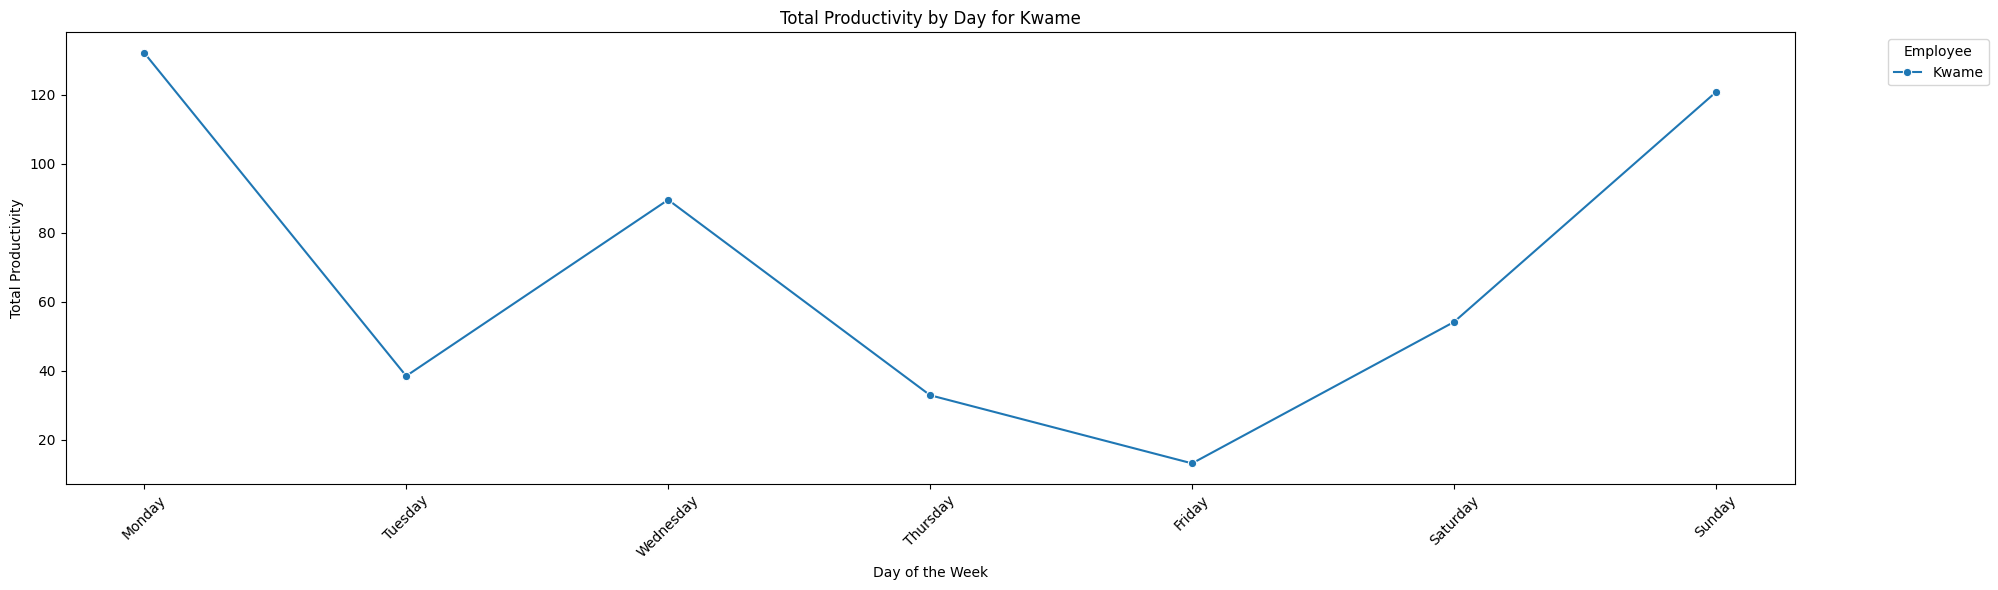

In [16]:
 plot_employee()

In [10]:
single_employee()

   Employee       days  Productivity
21   Akosua     Friday     49.194070
22   Akosua     Monday     27.964779
23   Akosua   Saturday     21.246581
24   Akosua     Sunday     71.491117
25   Akosua   Thursday     19.690617
26   Akosua    Tuesday     33.530154
27   Akosua  Wednesday     53.252266


NameError: name 'gen_filtered' is not defined

<Figure size 2000x600 with 0 Axes>

## PLOTTING FOR RANDOMLY CHOSEN EMPLOYEES

In [17]:
def plot_random_employees():

    plt.figure(figsize=(20, 6))
    random_employees = random.sample(gen_data_agg["Employee"].unique().tolist(), 3)
    random_filtered = gen_data_agg[gen_data_agg["Employee"].isin(random_employees)]

    sns.lineplot(data=random_filtered, x="days", y="Productivity", hue="Employee", marker="o")

    # Add title and labels
    plt.title(f"Total Productivity by Day for {random_employees}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Total Productivity")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the legend
    plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc="upper left")
    # Display the plot
    plt.tight_layout()

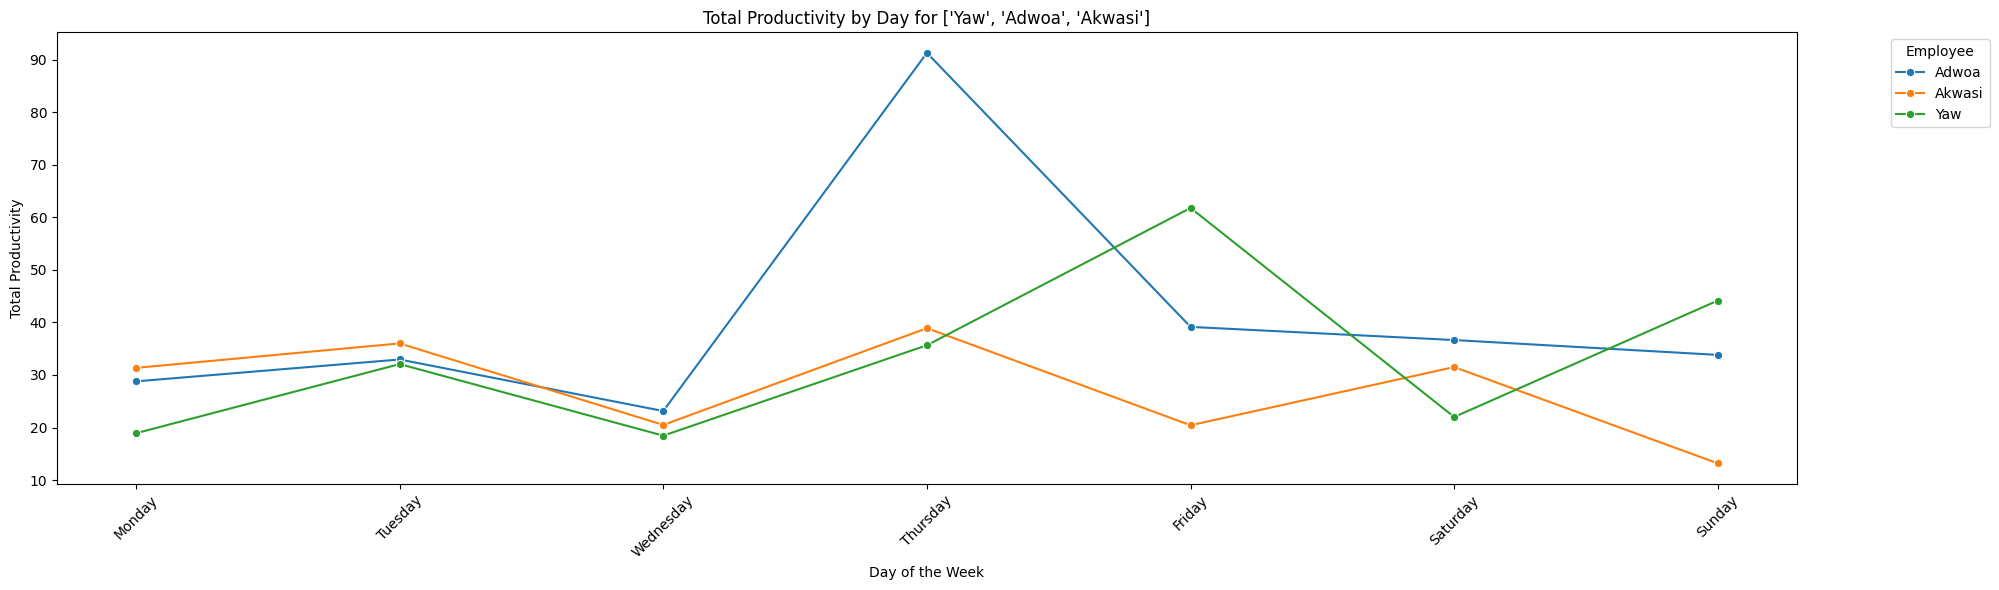

In [18]:
plot_random_employees()

In [88]:
def show_random_plot():
    random_employees = random.sample(gen_data_agg["Employee"].unique().tolist(), 3)
    random_filtered = gen_data_agg[gen_data_agg["Employee"].isin(random_employees)]
    plot_random_employees(random_employees)

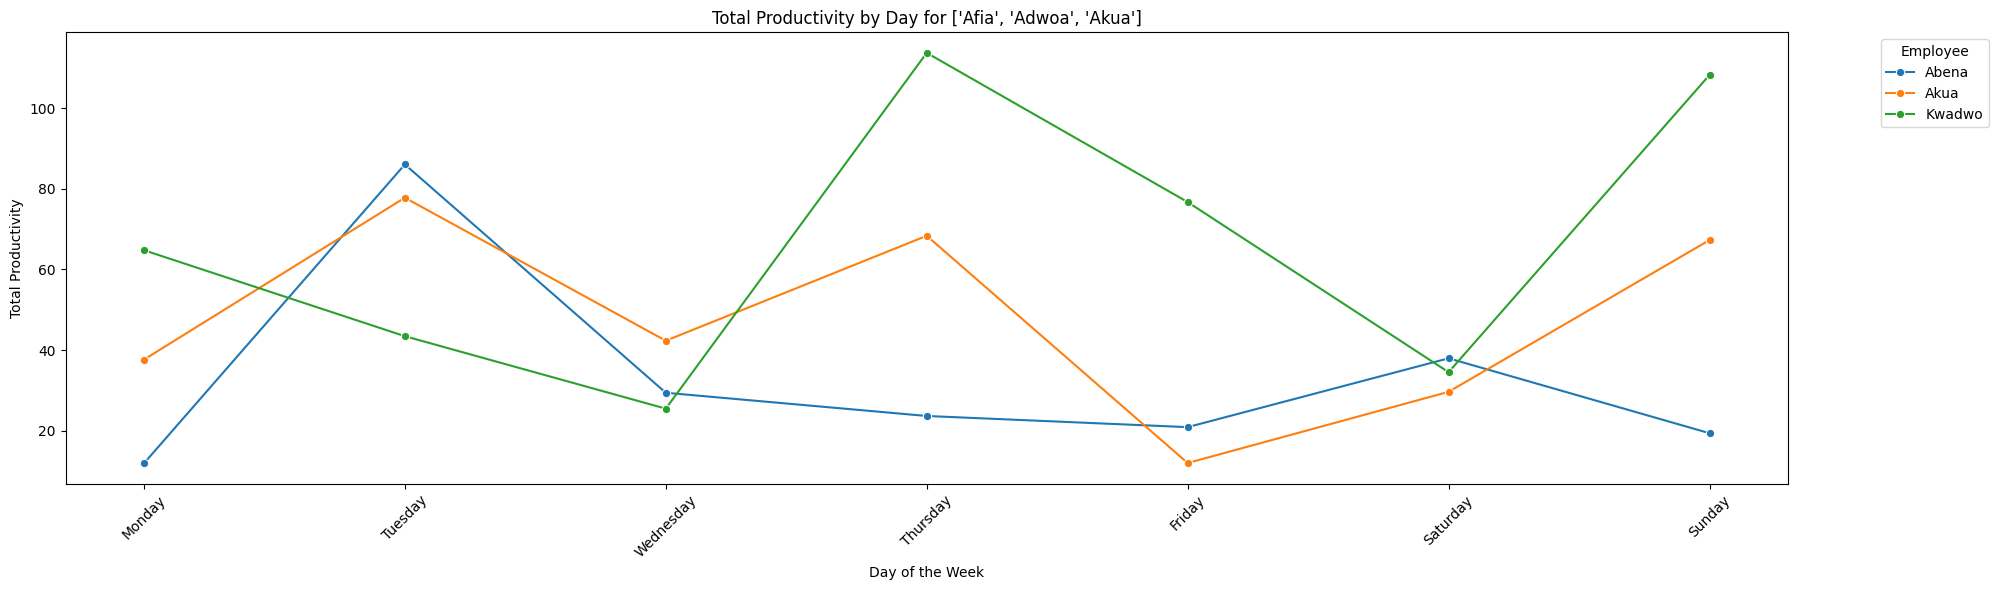

In [91]:
show_random_plot()

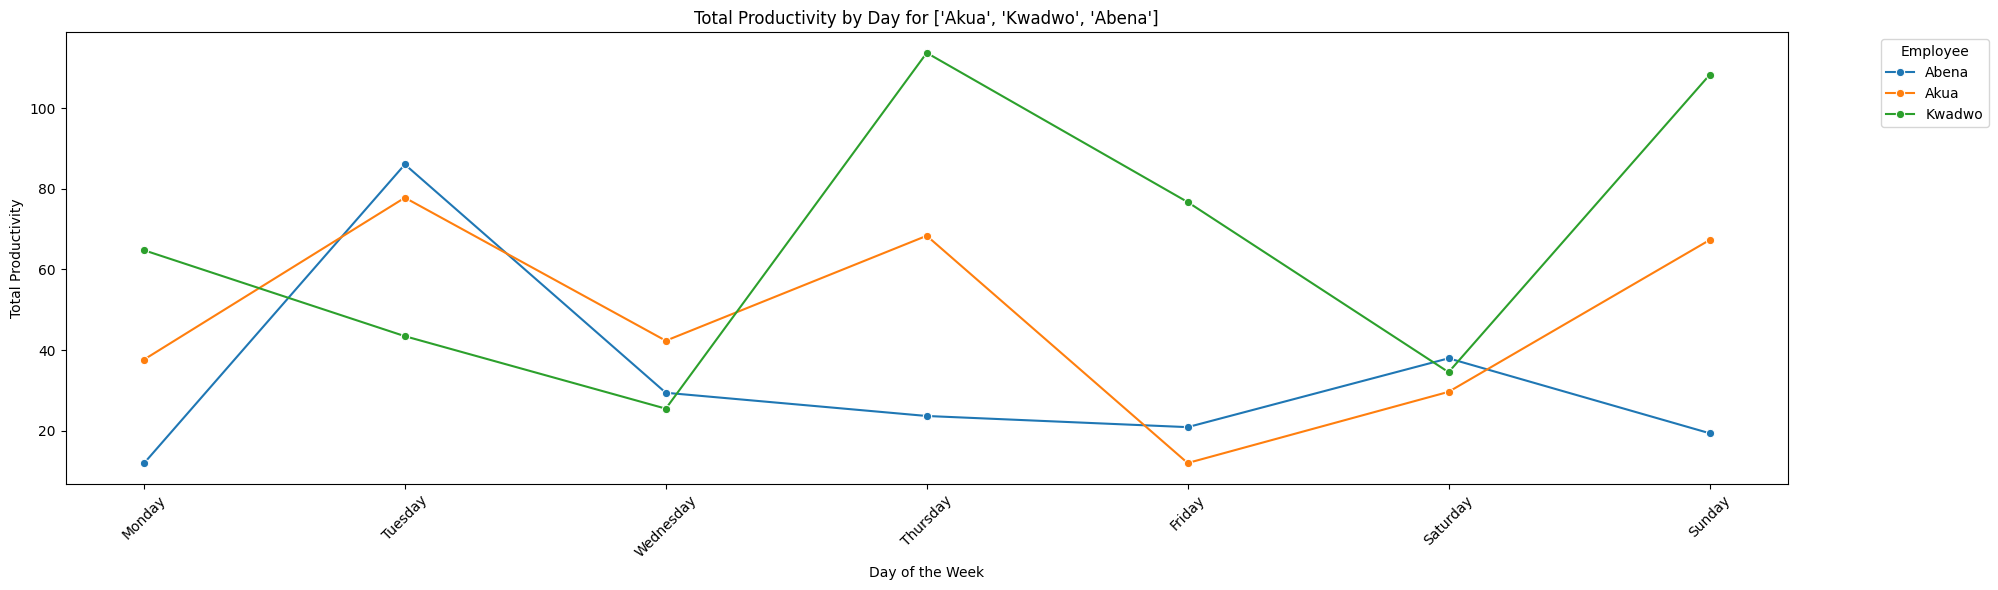

In [87]:
random_employees = random.sample(gen_data_agg["Employee"].unique().tolist(), 3)
random_filtered = gen_data_agg[gen_data_agg["Employee"].isin(random_employees)]
plot_random_employees(random_employees)

### Task Completion

## Workload Distribution